Saving Airfares_simple_garbled2.csv to Airfares_simple_garbled2 (2).csv


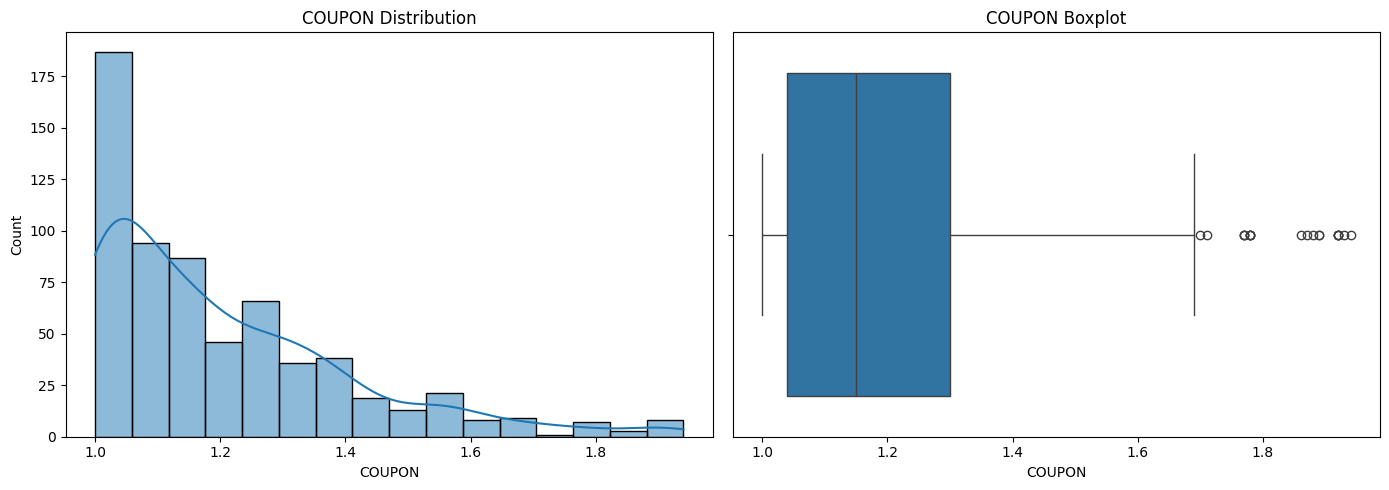

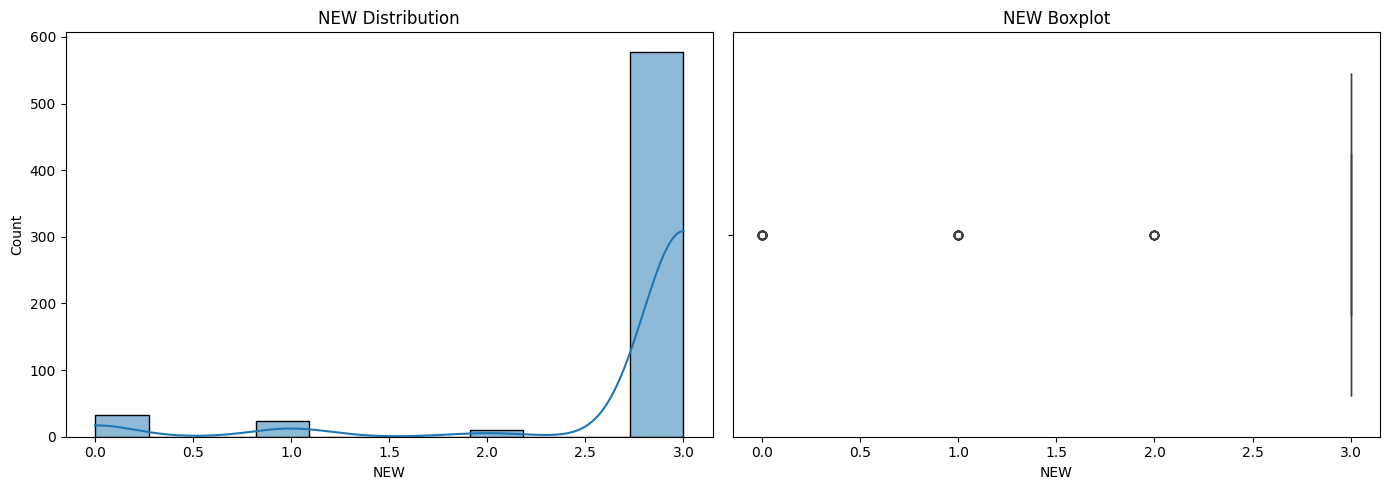

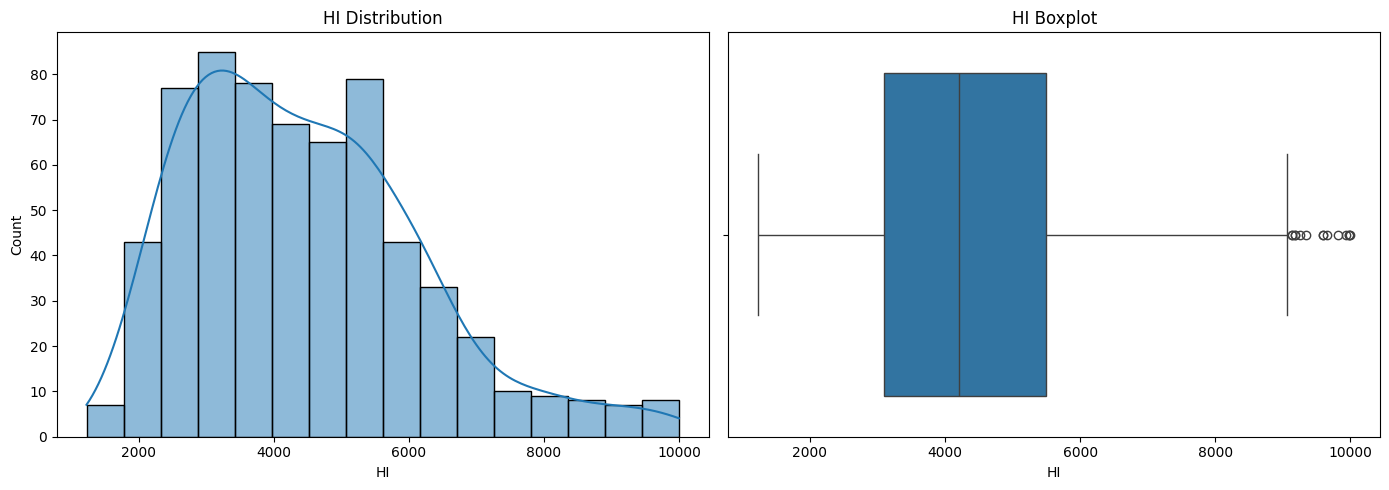

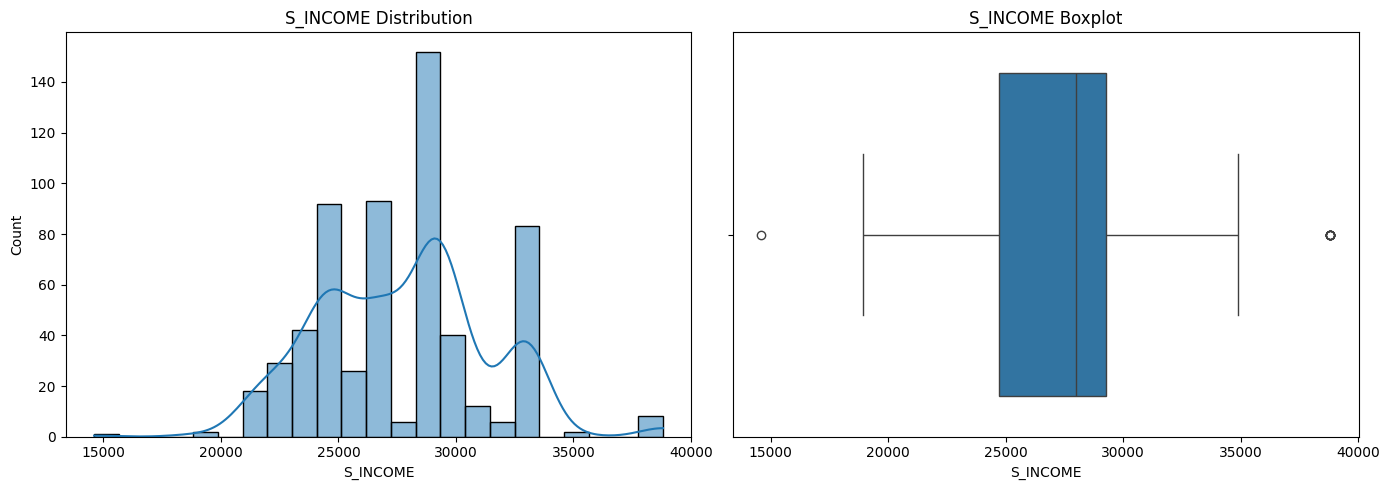

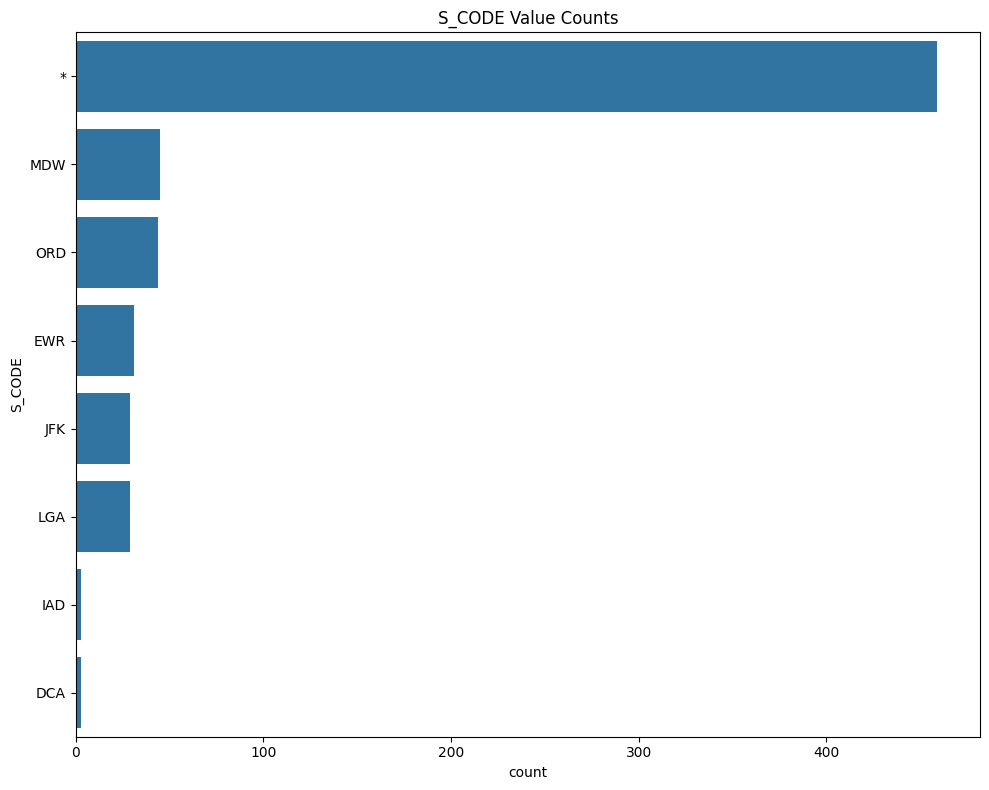

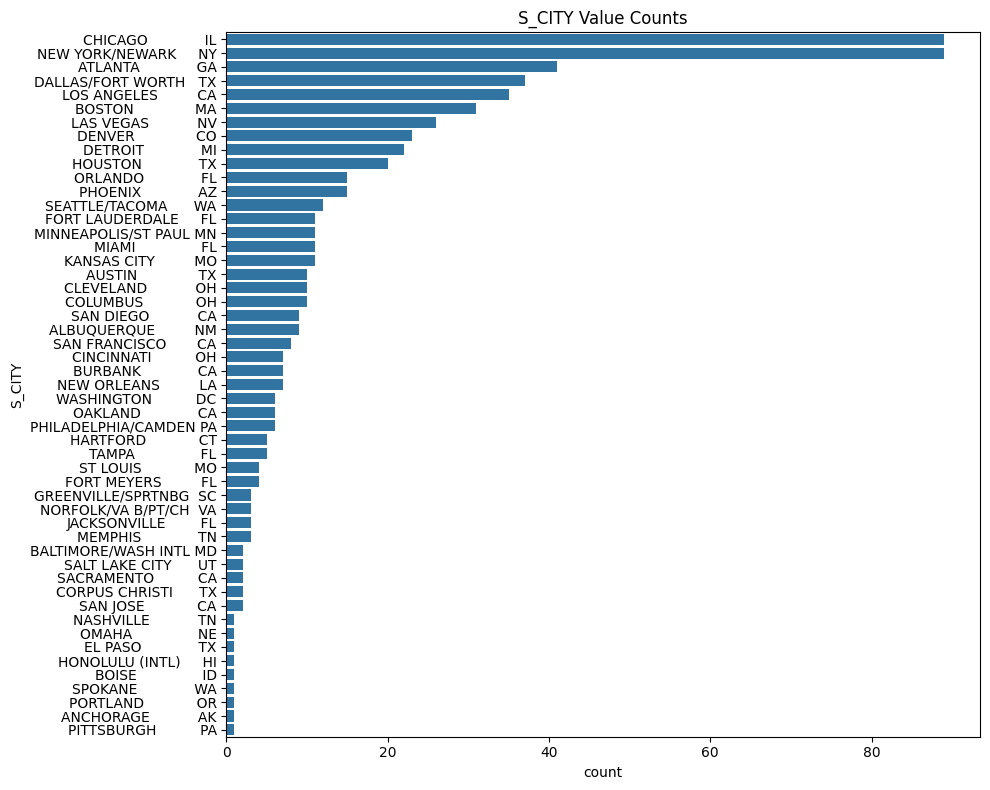

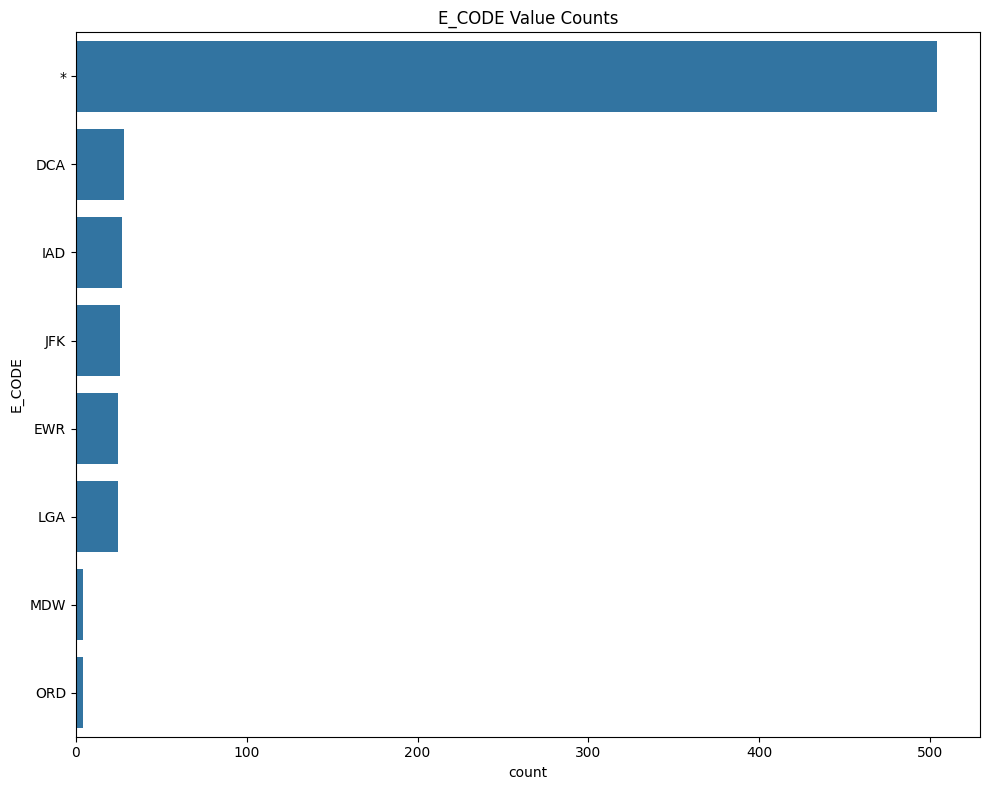

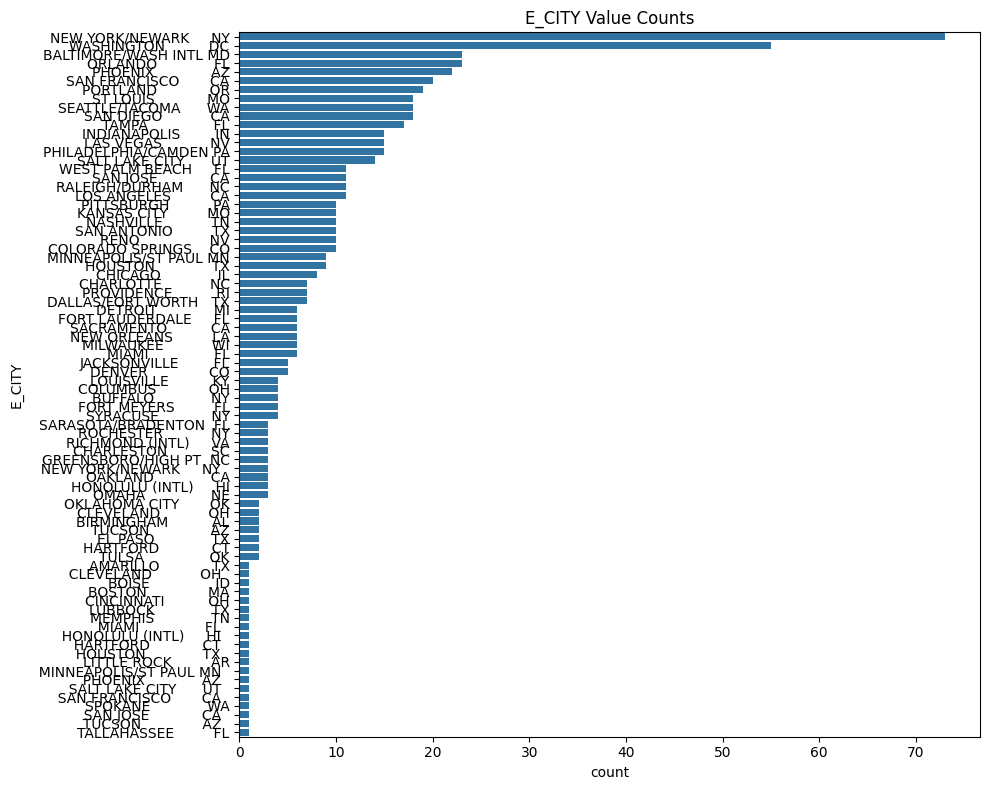

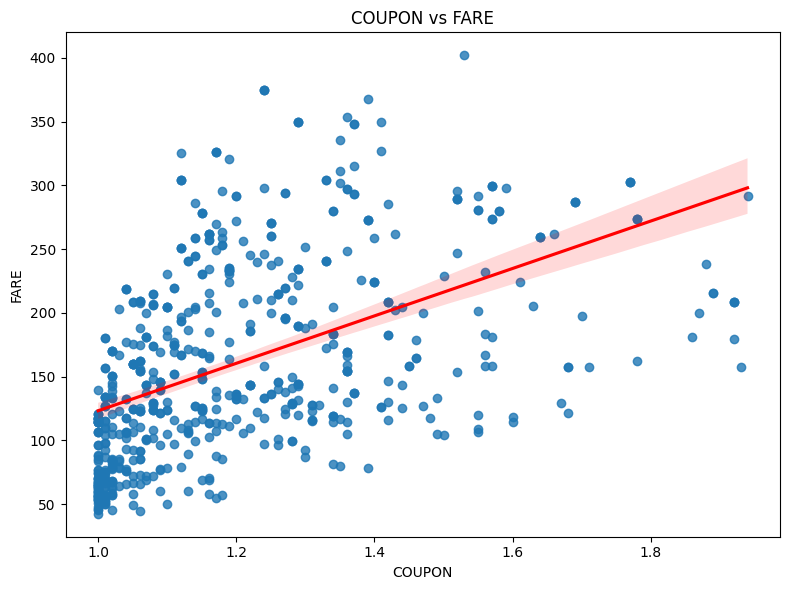

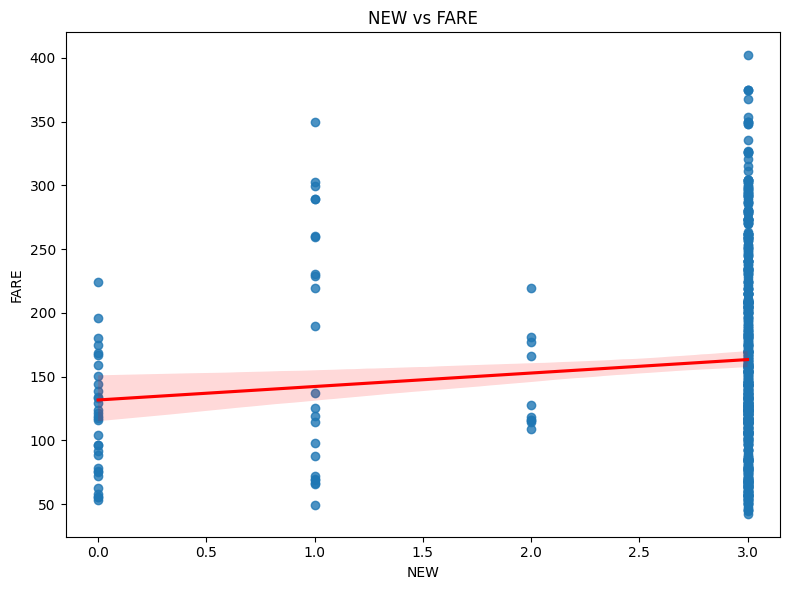

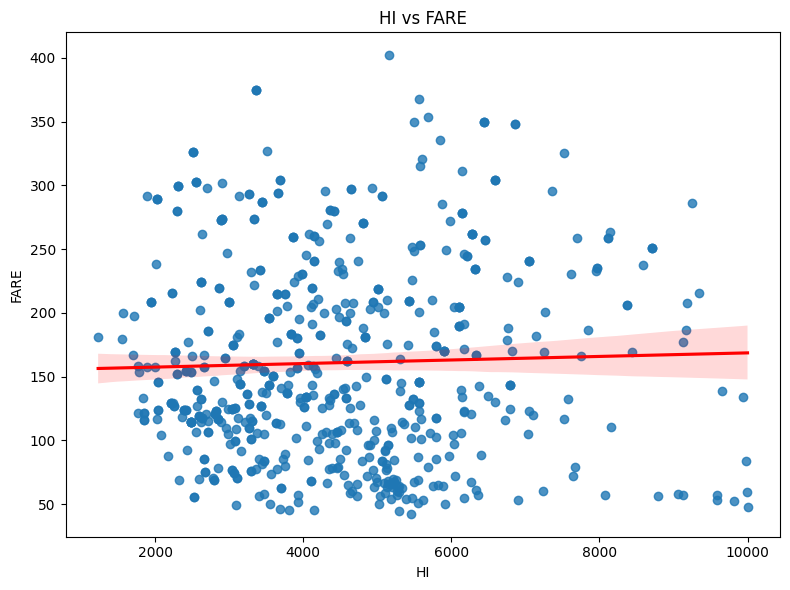

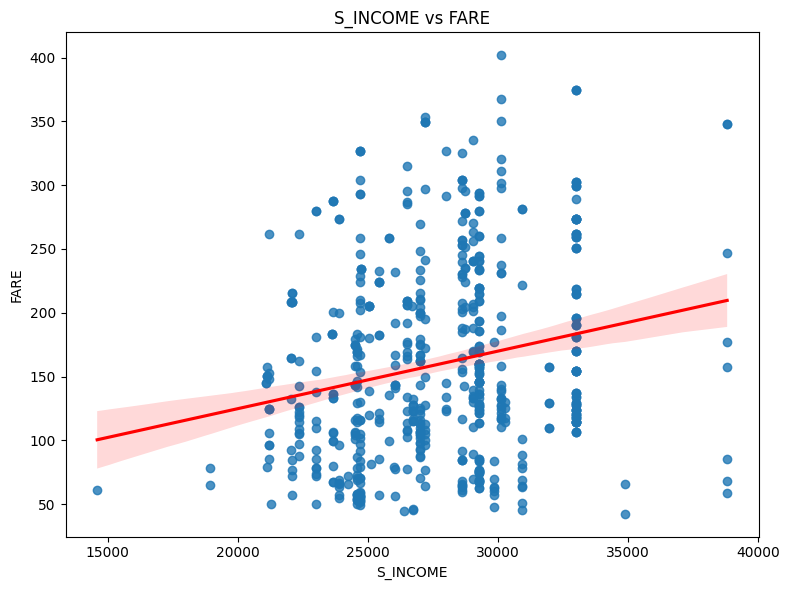

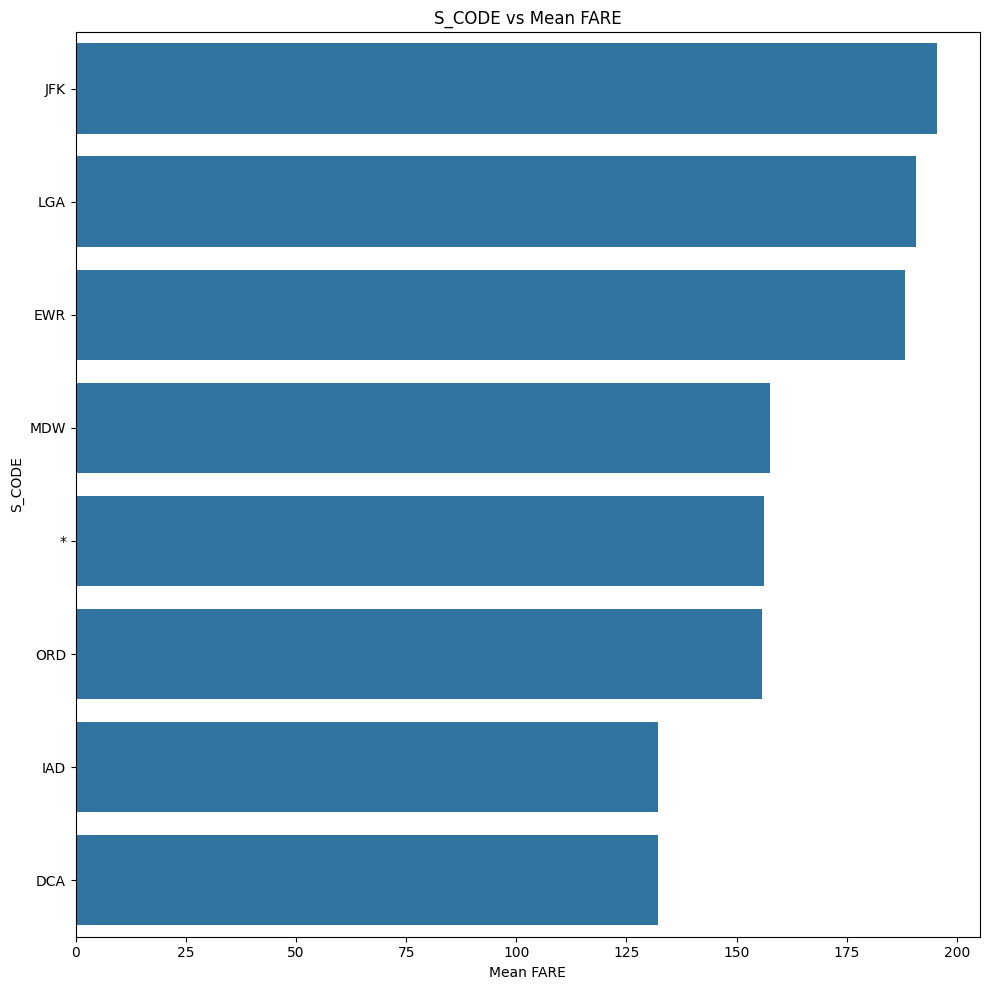

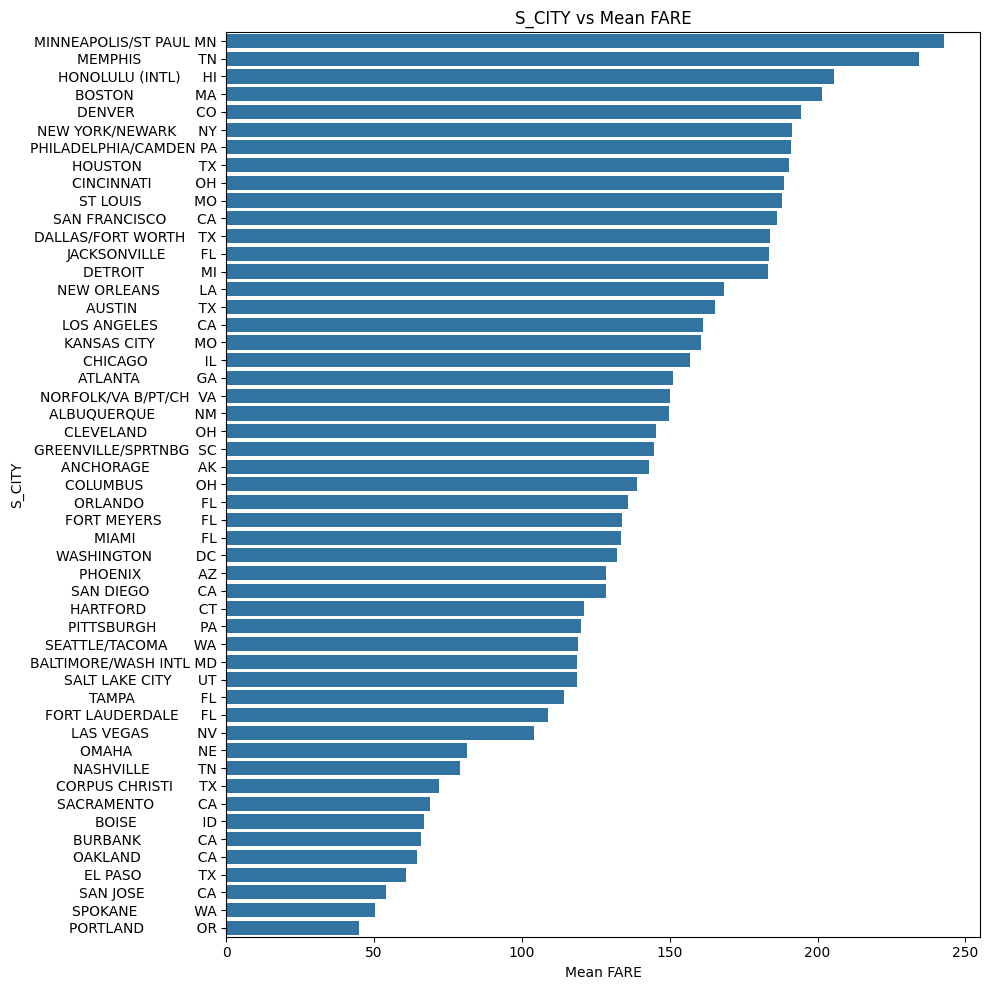

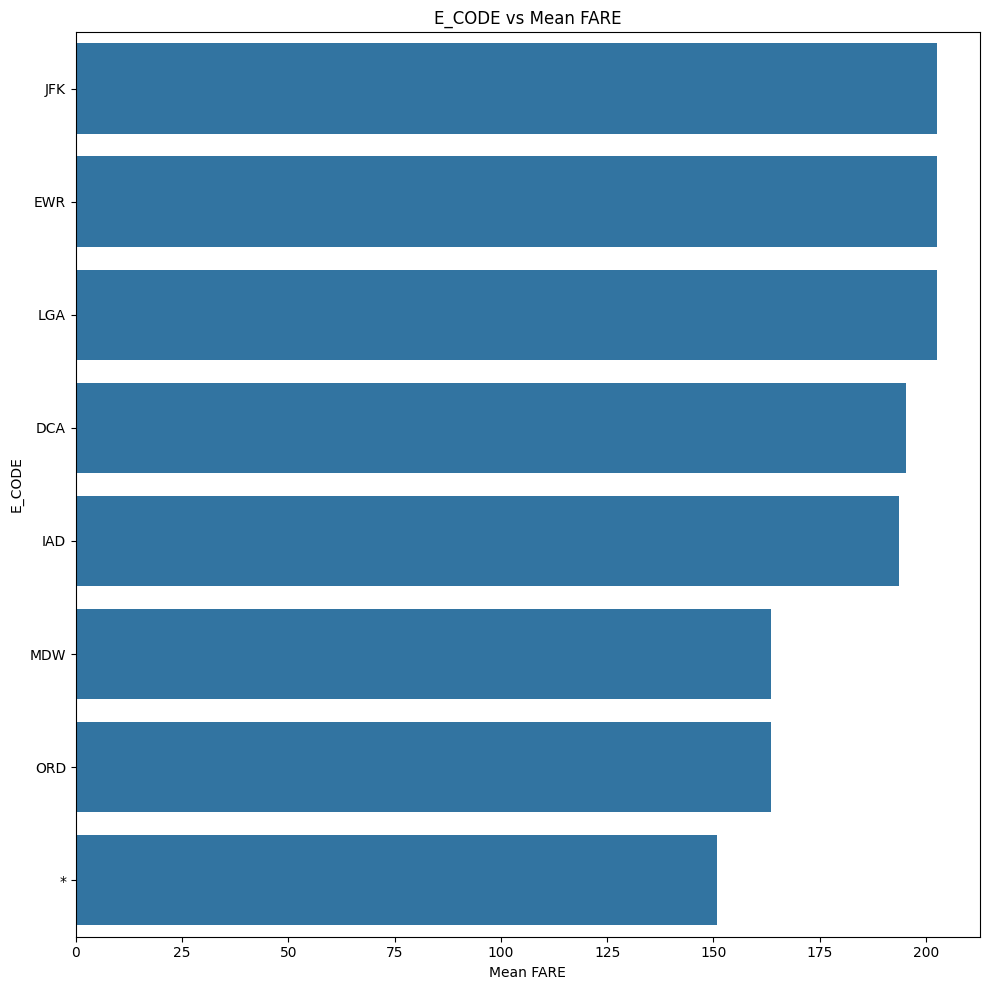

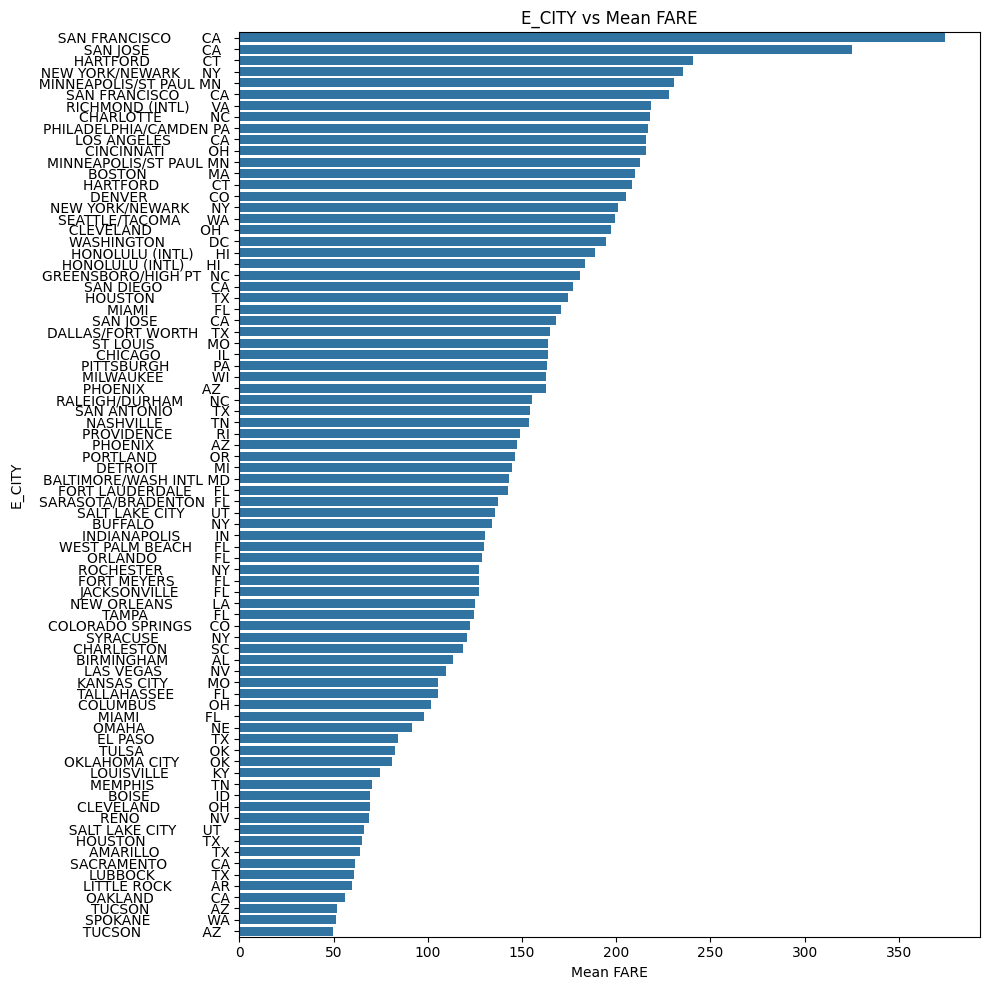

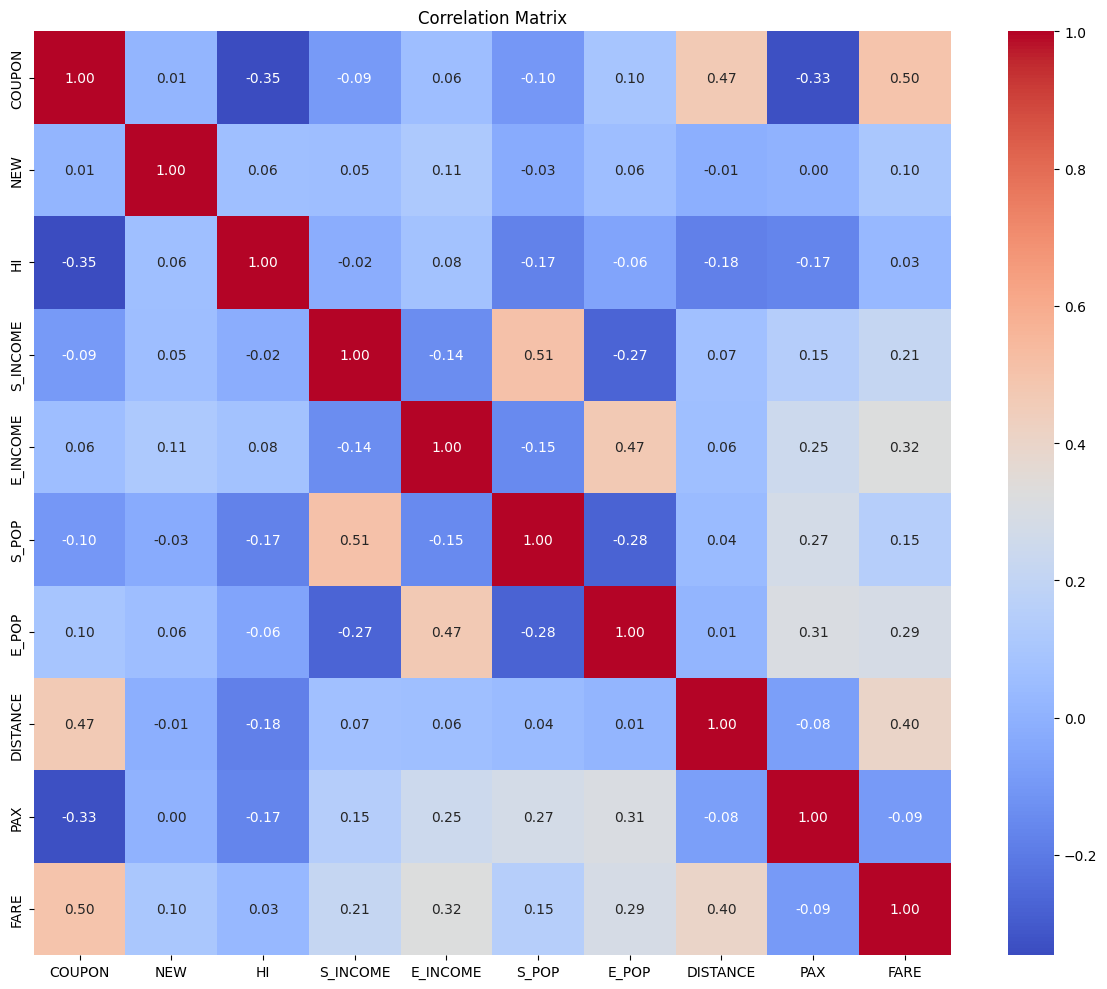

‚úÖ Ï†ÑÏ≤òÎ¶¨Îêú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉòÌîå:
     COUPON  NEW        HI  S_INCOME  E_INCOME     S_POP     E_POP  DISTANCE  \
0 -1.045211  0.0  0.505544  0.268623 -1.427718 -0.508127 -1.093425 -1.038802   
1 -0.729445  0.0  0.580346 -0.217694  0.509251 -0.343728  1.443856 -0.629929   
2 -0.729445  0.0  2.754864  0.078415  0.509251  0.403681  1.443856 -0.958267   
3 -0.729445  0.0 -1.044176  0.452915  0.509251  1.080946  1.443856 -0.574174   
4 -0.729445  0.0 -1.044176  0.452915  0.509251  1.080946  1.443856 -0.574174   

        PAX  S_CODE_DCA  ...  E_CITY_nan  VACATION_YES  VACATION_nan  SW_YES  \
0 -0.391859         0.0  ...         0.0           0.0           0.0     1.0   
1 -0.252551         0.0  ...         0.0           0.0           0.0     0.0   
2 -0.597615         0.0  ...         0.0           0.0           0.0     0.0   
3  2.126182         0.0  ...         0.0           0.0           0.0     1.0   
4  2.126182         0.0  ...         0.0           0.0           0.0     1

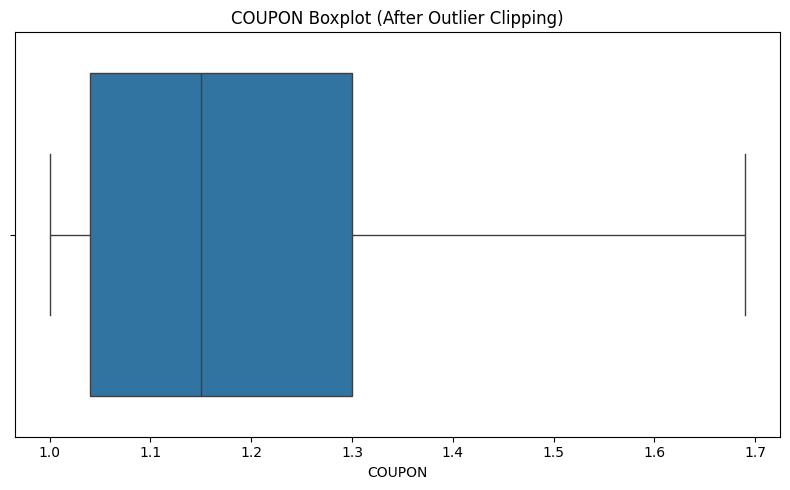

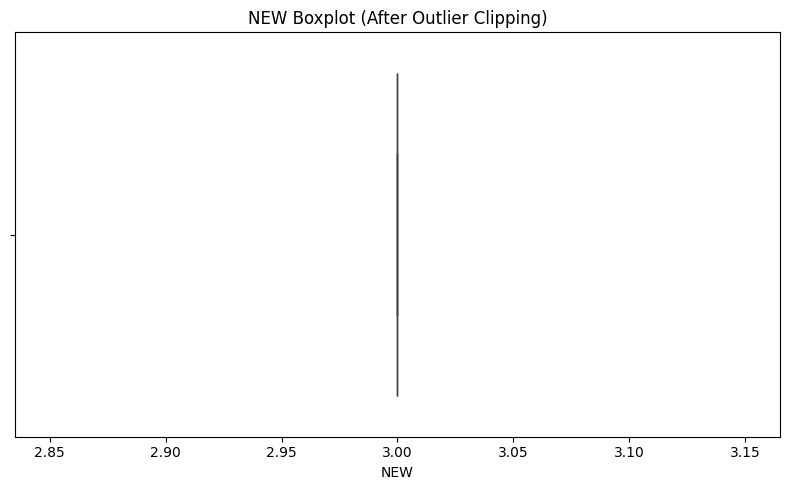

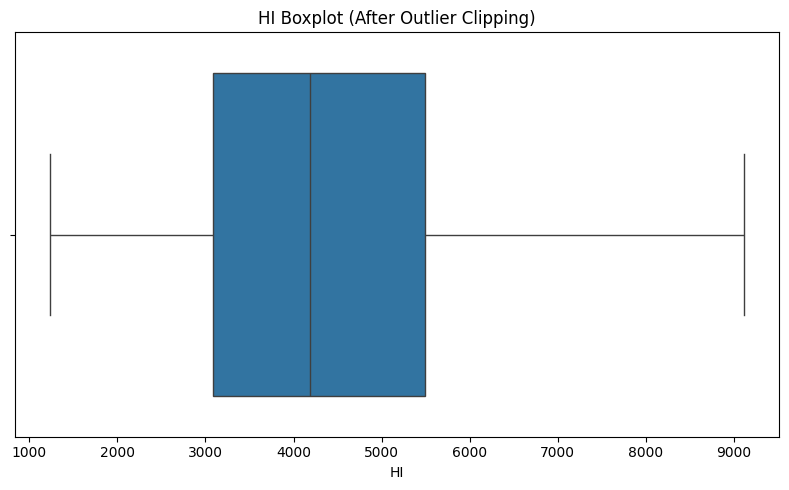

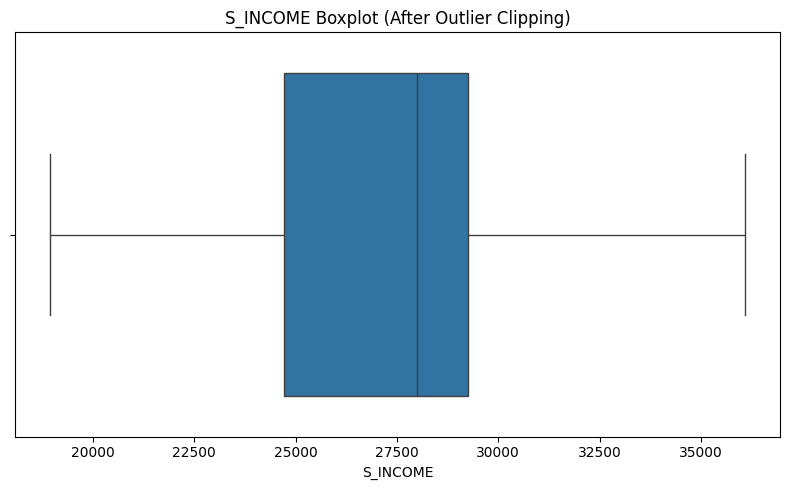

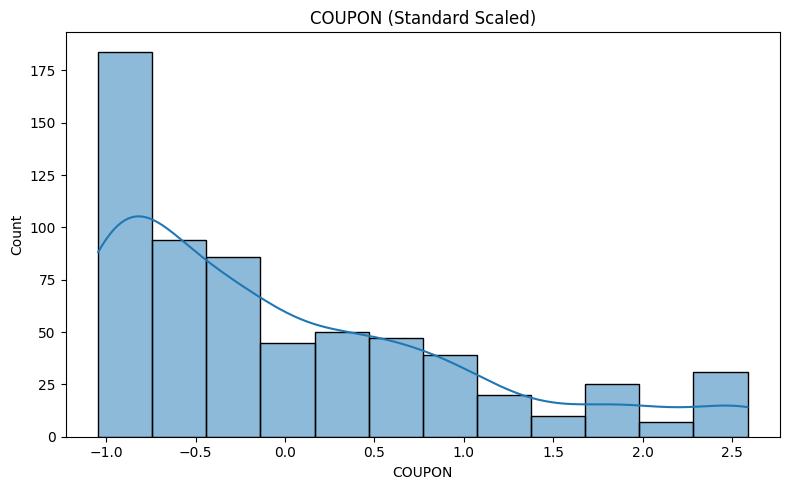

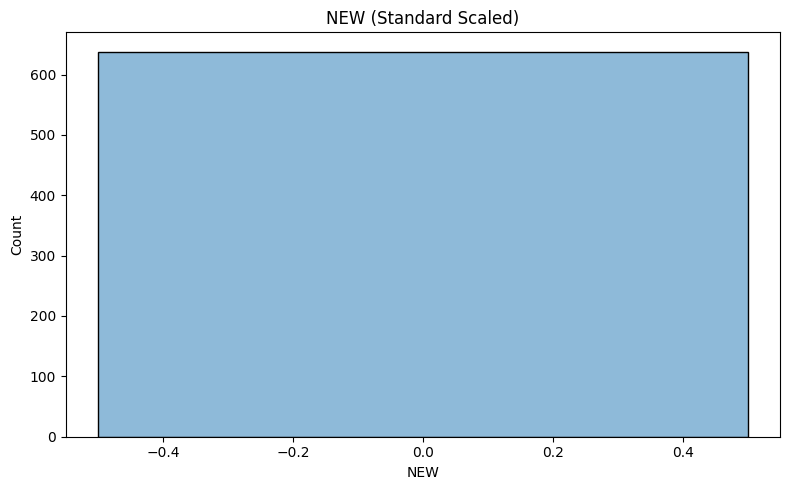

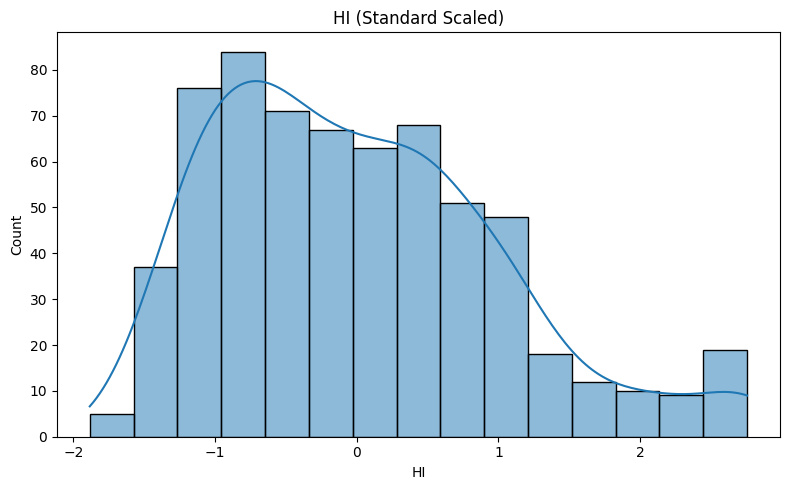

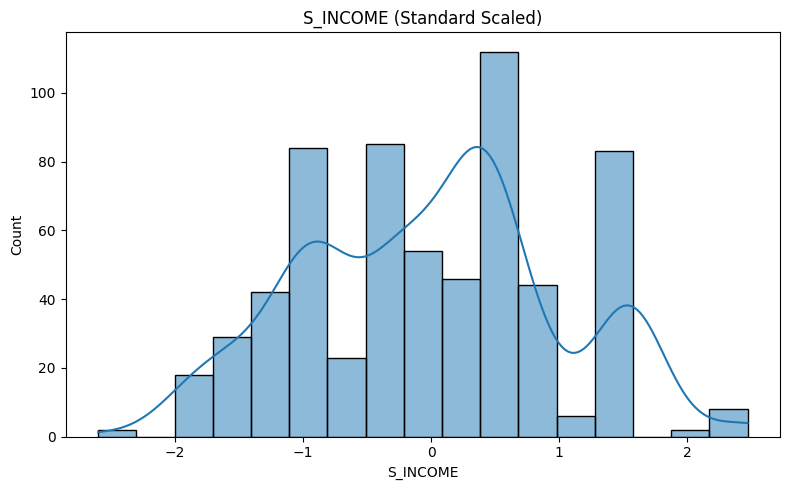

üìå Î≥ÄÏàò Ïàò ÏöîÏïΩ
1Ô∏è‚É£ ÏõêÎûò ÏàòÏπòÌòï Î≥ÄÏàò Ïàò: 9
2Ô∏è‚É£ Î≤îÏ£ºÌòï Î≥ÄÏàò Í≥†Ïú†Í∞í Ï¥ùÌï© (Ïù∏ÏΩîÎî© Ï†Ñ Í∏∞Ï§Ä): 154
3Ô∏è‚É£ Î≤îÏ£ºÌòï Î≥ÄÏàò Ïù∏ÏΩîÎî© ÌõÑ Ïª¨Îüº Ïàò (drop='first' Ï†ÅÏö©): 154
‚úÖ ÏµúÏ¢Ö feature Ïàò (Ïä§ÏºÄÏùºÎßÅÎêú ÏàòÏπòÌòï + Ïù∏ÏΩîÎî©Îêú Î≤îÏ£ºÌòï): 163


In [3]:
# ‚úÖ Phase 2.1 ~ 2.2 - Î≥ÄÏàò Ïú†Ìòï Î∂ÑÎ¶¨ Î∞è ÏãúÍ∞ÅÌôî, Î≥ÄÏàò Í∞Ñ Í¥ÄÍ≥Ñ Î∂ÑÏÑù


# ‚úÖ 1. ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# ‚úÖ 2. ColabÏóêÏÑú ÌååÏùº ÏóÖÎ°úÎìú
# ÏÇ¨Ïö©ÏûêÎ°úÎ∂ÄÌÑ∞ CSV ÌååÏùºÏùÑ ÏóÖÎ°úÎìúÎ∞õÏùå
from google.colab import files
uploaded = files.upload()

# ‚úÖ 3. ÏóÖÎ°úÎìúÎêú ÌååÏùºÏùÑ PandasÎ°ú Î°úÎìú
# ÌååÏùº Ïù¥Î¶Ñ Ï∂îÏ∂ú ÌõÑ, Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÏùΩÍ∏∞
import io
filename = list(uploaded.keys())[0]
df2 = pd.read_csv(io.BytesIO(uploaded[filename]))

# ‚úÖ 4. Î≥ÄÏàò Î∂ÑÎ¶¨ Î∞è Ï¥àÍ∏∞ ÏÑ§Ï†ï
TARGET_COLUMN = 'FARE'  # ÏòàÏ∏° Î™©Ìëú Î≥ÄÏàò
numeric_cols = df2.select_dtypes(include=[np.number]).columns.tolist()  # ÏàòÏπòÌòï Î≥ÄÏàò ÏûêÎèô Ï∂îÏ∂ú
categorical_cols = df2.select_dtypes(include='object').columns.tolist()  # Î≤îÏ£ºÌòï Î≥ÄÏàò ÏûêÎèô Ï∂îÏ∂ú
numeric_cols.remove(TARGET_COLUMN)  # ÌÉÄÍ≤ü Î≥ÄÏàòÎäî Ï†úÏô∏

# ‚úÖ Î≤îÏ£ºÌòï Î≥ÄÏàò ÎåÄÏÜåÎ¨∏Ïûê ÌÜµÏùº (Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî Î™©Ï†Å)
for col in categorical_cols:
    df2[col] = df2[col].astype(str).str.upper()

# ‚úÖ FARE ÏùåÏàò Ï†úÍ±∞ (ÌòÑÏã§Ï†ÅÏúºÎ°ú Ï°¥Ïû¨ Î∂àÍ∞ÄÎä•Ìïú ÏöîÍ∏à Ï†úÍ±∞)
df2 = df2[df2['FARE'] >= 0]

# ‚úÖ ÎåÄÌëú ÏàòÏπòÌòï Î≥ÄÏàò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî (Ï≤òÏùå 4Í∞ú)
# ÌûàÏä§ÌÜ†Í∑∏Îû® + KDEÎ°ú Î∂ÑÌè¨ ÌôïÏù∏ / Î∞ïÏä§ÌîåÎ°ØÏúºÎ°ú Ïù¥ÏÉÅÏπò ÌôïÏù∏
sample_numeric = numeric_cols[:4]
for col in sample_numeric:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(df2[col], kde=True, ax=axes[0])
    axes[0].set_title(f'{col} Distribution')  # Î∂ÑÌè¨ ÌôïÏù∏Ïö©
    sns.boxplot(x=df2[col], ax=axes[1])
    axes[1].set_title(f'{col} Boxplot')  # Ïù¥ÏÉÅÏπò ÌôïÏù∏Ïö©
    plt.tight_layout()
    plt.show()

# ‚úÖ ÎåÄÌëú Î≤îÏ£ºÌòï Î≥ÄÏàò ÎπàÎèÑÏàò ÏãúÍ∞ÅÌôî (Ï≤òÏùå 4Í∞ú, Í∞ÄÎ°ú ÎßâÎåÄ)
# Í∞Å Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Í∞í Î∂ÑÌè¨Î•º ÌååÏïÖÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ïó¨Î∂Ä ÌôïÏù∏
sample_categorical = categorical_cols[:4]
for col in sample_categorical:
    plt.figure(figsize=(10, 8))
    order = df2[col].value_counts().index  # Í∞í ÎßéÏùÄ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨
    sns.countplot(data=df2, y=col, order=order)
    plt.title(f'{col} Value Counts')  # Î≤îÏ£º ÎπàÎèÑ ÏãúÍ∞ÅÌôî
    plt.tight_layout()
    plt.show()

# ‚úÖ ÏàòÏπòÌòï Î≥ÄÏàò vs ÌÉÄÍ≤ü Î≥ÄÏàò Í¥ÄÍ≥Ñ ÏãúÍ∞ÅÌôî (ÏÇ∞Ï†êÎèÑ + ÌöåÍ∑ÄÏÑ†)
# ÌöåÍ∑ÄÏÑ†ÏùÑ ÌÜµÌï¥ ÏÑ†ÌòïÏ†Å Í¥ÄÍ≥Ñ Ïó¨Î∂ÄÎ•º ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌôïÏù∏
for col in sample_numeric:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df2[col], y=df2[TARGET_COLUMN], line_kws={"color": "red"})
    plt.title(f'{col} vs {TARGET_COLUMN}')
    plt.tight_layout()
    plt.show()

# ‚úÖ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ≥Ñ ÌÉÄÍ≤ü ÌèâÍ∑† ÏãúÍ∞ÅÌôî (Î∞î Ï∞®Ìä∏)
# Í∞Å Î≤îÏ£ºÏóê Îî∞Îùº ÏöîÍ∏à ÌèâÍ∑†Ïù¥ Ïñ¥ÎñªÍ≤å Îã¨ÎùºÏßÄÎäîÏßÄ ÏãúÍ∞ÅÌôî
for col in sample_categorical:
    plt.figure(figsize=(10, 10))
    category_means = df2.groupby(col)[TARGET_COLUMN].mean().sort_values(ascending=False)
    sns.barplot(y=category_means.index, x=category_means.values)
    plt.title(f'{col} vs Mean {TARGET_COLUMN}')  # ÌèâÍ∑† ÏöîÍ∏à ÎπÑÍµê
    plt.xlabel(f'Mean {TARGET_COLUMN}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# ‚úÖ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
# ÏàòÏπòÌòï Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Ìïú ÎààÏóê ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌôïÏù∏
plt.figure(figsize=(12, 10))
corr_matrix = df2[numeric_cols + [TARGET_COLUMN]].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")  # Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
plt.tight_layout()
plt.show()



# ‚úÖ Phase 2.3 - Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ÅÏö©



from sklearn.impute import SimpleImputer  # Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Ïù∏ÏΩîÎî© Î∞è Ïä§ÏºÄÏùºÎßÅ

# ÏàòÏπòÌòï/Î≤îÏ£ºÌòï Î≥ÄÏàò Íµ¨Î∂Ñ
numeric_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df2.select_dtypes(include='object').columns.tolist()
numeric_cols.remove(TARGET_COLUMN) # ÌÉÄÍ≤ü Î≥ÄÏàòÎäî ÏàòÏπòÌòïÏù¥ÏßÄÎßå Ï†úÏô∏


# 5. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
# ÏàòÏπòÌòï Î≥ÄÏàòÎäî Ï§ëÏïôÍ∞í(median), Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî ÏµúÎπàÍ∞í(most frequent)ÏúºÎ°ú Ï±ÑÏõÄ
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Í∞ÅÍ∞Å Ï≤òÎ¶¨ ÌõÑ Îã§Ïãú DataFrameÏúºÎ°ú Î≥ÄÌôò (Ïª¨ÎüºÎ™Ö Ïú†ÏßÄ)
df2[numeric_cols] = pd.DataFrame(num_imputer.fit_transform(df2[numeric_cols]), columns=numeric_cols)
df2[categorical_cols] = pd.DataFrame(cat_imputer.fit_transform(df2[categorical_cols]), columns=categorical_cols)


# ‚úÖ Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Ìï®Ïàò Ï†ïÏùò (IQR Î∞©Ïãù)
# Ïù¥ÏÉÅÏπòÎ•º Q1 - 1.5*IQR Ïù¥Ìïò ÎòêÎäî Q3 + 1.5*IQR Ïù¥ÏÉÅÏúºÎ°ú Í∞ÑÏ£ºÌïòÏó¨ clip Ï≤òÎ¶¨
# ÎÑàÎ¨¥ ÌÅ∞ Ïù¥ÏÉÅÍ∞íÏù¥ Î™®Îç∏Ïóê ÏôúÍ≥°ÏùÑ Ï§Ñ Í≤ΩÏö∞ ÏôÑÌôîÌï† Ïàò ÏûàÏùå
def clip_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[column].clip(lower=lower, upper=upper)

# Î™®Îì† ÏàòÏπòÌòï Î≥ÄÏàòÏóê Ïù¥ÏÉÅÏπò ÌÅ¥Î¶¨Ìïë Ï†ÅÏö©
for col in numeric_cols:
    df2[col] = clip_outliers_iqr(df2, col)

# ‚úÖ Î≤îÏ£ºÌòï Î≥ÄÏàò Ïù∏ÏΩîÎî©: One-Hot Ïù∏ÏΩîÎî© (Ï≤´ Î≤àÏß∏ Î≤îÏ£º Ï†úÏô∏ ‚Üí Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î∞©ÏßÄ)

# handle_unknown='ignore': ÌÖåÏä§Ìä∏ÏÖãÏóê ÌïôÏäµ Ïãú Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïòÎçò Î≤îÏ£ºÍ∞Ä Îì§Ïñ¥ÏôÄÎèÑ Ïò§Î•ò ÏóÜÏù¥ Ï≤òÎ¶¨
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Î≤îÏ£ºÌòï Î≥ÄÏàò(categorical_cols)Ïóê ÎåÄÌï¥ Ïù∏ÏΩîÎî©ÏùÑ ÏàòÌñâ
encoded = encoder.fit_transform(df2[categorical_cols])  # Í≤∞Í≥ºÎäî numpy Î∞∞Ïó¥ ÌòïÌÉú

# Ïù∏ÏΩîÎî©Îêú Í≤∞Í≥ºÏùò Ïª¨ÎüºÎ™ÖÏùÑ Ï∂îÏ∂ú (Ïòà: 'CITY_NEW_YORK', 'AIRLINE_DELTA' Îì±)
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# numpy Î∞∞Ïó¥ÏùÑ DataFrameÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ Ïª¨ÎüºÎ™ÖÏùÑ Ï†ÅÏö©
df_encoded = pd.DataFrame(encoded, columns=encoded_cols)

# ‚úÖ ÏàòÏπòÌòï Î≥ÄÏàò Ïä§ÏºÄÏùºÎßÅ: ÌèâÍ∑† 0, ÌëúÏ§ÄÌé∏Ï∞® 1Î°ú ÌëúÏ§ÄÌôî
# ÌäπÌûà ÏÑ†Ìòï ÌöåÍ∑Ä, SVM, Ïã†Í≤ΩÎßù, KNN Îì±ÏóêÏÑú Ìö®Í≥ºÏ†Å
scaler = StandardScaler()

# ÏàòÏπòÌòï Î≥ÄÏàò(numeric_cols)Ïóê ÎåÄÌï¥ Ïä§ÏºÄÏùºÎßÅ ÏàòÌñâ
scaled = scaler.fit_transform(df2[numeric_cols])  # Í≤∞Í≥ºÎäî numpy Î∞∞Ïó¥

# Ïä§ÏºÄÏùºÎêú Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôò, Í∏∞Ï°¥ ÏàòÏπòÌòï Ïª¨ÎüºÎ™Ö Ïú†ÏßÄ
df_scaled = pd.DataFrame(scaled, columns=numeric_cols)

# ÏµúÏ¢Ö Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï©
df_processed = pd.concat([df_scaled.reset_index(drop=True), # Ïä§ÏºÄÏùºÎêú ÏàòÏπòÌòï Î≥ÄÏàò
                          df_encoded.reset_index(drop=True),  # Ïù∏ÏΩîÎî©Îêú Î≤îÏ£ºÌòï Î≥ÄÏàò
                          df2[[TARGET_COLUMN]].reset_index(drop=True)], axis=1) # ÌÉÄÍ≤ü Î≥ÄÏàò FARE # Ïó¥ Î∞©Ìñ•ÏúºÎ°ú Ìï©ÏπòÍ∏∞


# Í≤∞Í≥º ÌôïÏù∏
print("‚úÖ Ï†ÑÏ≤òÎ¶¨Îêú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉòÌîå:")
print(df_processed.head())  # Ïïû 5Í∞ú Ìñâ Ï∂úÎ†•

print("\n‚úÖ Ï†ÑÏ≤òÎ¶¨Îêú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖã ÌòïÌÉú (Ìñâ, Ïó¥):", df_processed.shape)

# ‚úÖ Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ ÌõÑ ÏàòÏπòÌòï Î≥ÄÏàòÏùò Î∞ïÏä§ÌîåÎ°Ø (Ï≤òÏùå 4Í∞ú)
sample_numeric = numeric_cols[:4]
for col in sample_numeric:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df2[col])
    plt.title(f'{col} Boxplot (After Outlier Clipping)')
    plt.tight_layout()
    plt.show()

# ‚úÖ Ïä§ÏºÄÏùºÎßÅ ÌõÑ ÏàòÏπòÌòï Î≥ÄÏàò Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû® (Ï≤òÏùå 4Í∞ú)
sample_scaled = df_scaled[numeric_cols[:4]]

for col in sample_scaled.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(sample_scaled[col], kde=True)
    plt.title(f'{col} (Standard Scaled)')
    plt.tight_layout()
    plt.show()


# ‚úÖ Ï†ÑÏ≤òÎ¶¨ Ï†Ñ ÏõêÎûò Î≥ÄÏàò Í∞úÏàòÏôÄ Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÌäπÏßï Ïàò ÎπÑÍµê

# ÏõêÎûò ÏàòÏπòÌòï Î≥ÄÏàò Í∞úÏàò
num_features_original = len(numeric_cols)

# Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Ïõê-Ìï´ Ïù∏ÏΩîÎî© ÌõÑ Ïó¨Îü¨ Í∞úÏùò Ïª¨ÎüºÏúºÎ°ú ÎÇòÎâòÎØÄÎ°ú,
# Í∞Å Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Í≥†Ïú†Í∞í Í∞úÏàò(Ïú†ÎãàÌÅ¨Ìïú ÌÅ¥ÎûòÏä§ Ïàò)Î•º Î™®Îëê ÎçîÌïòÏó¨ Ï†ÑÏ≤¥ ÏõêÎûò Î≤îÏ£ºÏùò ÏàòÎ•º Íµ¨Ìï®
cat_feature_levels = sum([df2[col].nunique() for col in categorical_cols])

# ‚Üí Îã®, OneHotEncoder(drop='first')Î•º ÏÇ¨Ïö©ÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Ïã§Ï†ú Ïù∏ÏΩîÎî©Îêú Ïª¨Îüº ÏàòÎäî
# Í≥†Ïú†Í∞í Í∞úÏàò - 1Ïî©ÏùÑ Î≥ÄÏàòÎßàÎã§ Ï†ÅÏö©Ìïú Í≤∞Í≥ºÏûÑ

# Ïã§Ï†ú Ïù∏ÏΩîÎî© ÌõÑ ÏÉùÏÑ±Îêú Ïª¨Îüº Ïàò
encoded_feature_count = df_encoded.shape[1]

# ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©Îêú ÌäπÏßï(feature)Ïùò ÏàòÎäî:
# - Ïä§ÏºÄÏùºÎßÅÎêú ÏàòÏπòÌòï Î≥ÄÏàò Ïàò
# - Ïù∏ÏΩîÎî©Îêú Î≤îÏ£ºÌòï Î≥ÄÏàò Ïàò
final_feature_count = df_scaled.shape[1] + df_encoded.shape[1]

# Í≤∞Í≥º Ï∂úÎ†•
print("üìå Î≥ÄÏàò Ïàò ÏöîÏïΩ")
print(f"1Ô∏è‚É£ ÏõêÎûò ÏàòÏπòÌòï Î≥ÄÏàò Ïàò: {num_features_original}")
print(f"2Ô∏è‚É£ Î≤îÏ£ºÌòï Î≥ÄÏàò Í≥†Ïú†Í∞í Ï¥ùÌï© (Ïù∏ÏΩîÎî© Ï†Ñ Í∏∞Ï§Ä): {cat_feature_levels}")
print(f"3Ô∏è‚É£ Î≤îÏ£ºÌòï Î≥ÄÏàò Ïù∏ÏΩîÎî© ÌõÑ Ïª¨Îüº Ïàò (drop='first' Ï†ÅÏö©): {encoded_feature_count}")
print(f"‚úÖ ÏµúÏ¢Ö feature Ïàò (Ïä§ÏºÄÏùºÎßÅÎêú ÏàòÏπòÌòï + Ïù∏ÏΩîÎî©Îêú Î≤îÏ£ºÌòï): {final_feature_count}")




----------------------------------------------------

Í≤∞Î°†(Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Í∞ÄÏÑ§ ÏàòÎ¶Ω Î∞è Í≤ÄÏ¶ù)

üéØ 1. Í≤ΩÏú† ÏàòÏôÄ Ïö¥ÏûÑ Í∞Ñ Í¥ÄÍ≥Ñ
‚úÖ ÏãúÍ∞ÅÌôî Í≤∞Í≥º
COUPONÏù¥ ÎßéÏùÑÏàòÎ°ù FAREÍ∞Ä Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•ÏùÑ Î≥¥ÏûÑ (ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ)

ÌöåÍ∑ÄÏÑ†Ïù¥ ÏôÑÎßåÌïòÍ≤å Ïö∞ÏÉÅÌñ•

üìå Í∞ÄÏÑ§ ‚ë†
‚ÄúÍ≤ΩÏú† ÌöüÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù Ìï≠Í≥µ Ïö¥ÏûÑÏù¥ ÎÜíÏïÑÏßÑÎã§.‚Äù

üß™ Í≤ÄÏ¶ù Î∞©Î≤ï
ÏÉÅÍ¥ÄÍ≥ÑÏàò(R), p-value

üéØ 2. ÎÖ∏ÏÑ† Ïã†Í∑úÏÑ±(NEW)Í≥º Ïö¥ÏûÑ
‚úÖ ÏãúÍ∞ÅÌôî Í≤∞Í≥º
NEWÍ∞Ä 3Ïù∏ Ïã†Í∑úÎÖ∏ÏÑ†ÏùºÏàòÎ°ù ÌèâÍ∑† ÏöîÍ∏àÏù¥ ÎÇÆÏùå

ÏùºÎ∂Ä ÎèÑÏãúÏóêÏÑúÎßå Î™ÖÌôïÌïú Ìå®ÌÑ¥

üìå Í∞ÄÏÑ§ ‚ë°
‚ÄúÏã†Í∑ú ÎÖ∏ÏÑ†ÏùÄ ÌîÑÎ°úÎ™®ÏÖò Í∞ÄÍ≤© ÎïåÎ¨∏Ïóê Í∏∞Ï°¥ ÎÖ∏ÏÑ†Î≥¥Îã§ ÌèâÍ∑† Ïö¥ÏûÑÏù¥ ÎÇÆÎã§.‚Äù

üß™ Í≤ÄÏ¶ù Î∞©Î≤ï
NEW Í∞íÏóê Îî∞Î•∏ Í∑∏Î£πÎ≥Ñ ÌèâÍ∑† FARE ÎπÑÍµê (ANOVA ÎòêÎäî t-test)

üéØ 3. Ìò∏ÌÖîÏßÄÏàò(HI)ÏôÄ Ïö¥ÏûÑ
‚úÖ ÏãúÍ∞ÅÌôî Í≤∞Í≥º
HIÍ∞Ä ÎÜíÏùÑÏàòÎ°ù FAREÎèÑ ÎÜíÏïÑÏßÄÎäî Í≤ΩÌñ•

Í¥ÄÍ¥ëÏßÄÏùºÏàòÎ°ù ÏöîÍ∏àÏù¥ ÏÉÅÏäπ

üìå Í∞ÄÏÑ§ ‚ë¢
‚ÄúÍ¥ÄÍ¥ë ÏàòÏöîÍ∞Ä ÎÜíÏùÄ ÏßÄÏó≠ÏùºÏàòÎ°ù Ìï≠Í≥µ Ïö¥ÏûÑÏù¥ ÎÜíÍ≤å Ï±ÖÏ†ïÎêúÎã§.‚Äù

üß™ Í≤ÄÏ¶ù Î∞©Î≤ï
HI ÏÉÅÏúÑ 25% vs ÌïòÏúÑ 25% Í∑∏Î£πÏùò FARE ÎπÑÍµê

ÌöåÍ∑ÄÎ∂ÑÏÑùÏóêÏÑú HI Í≥ÑÏàò ÌôïÏù∏

üéØ 4. Ï∂úÎ∞úÏßÄ ÏÜåÎìù(S_INCOME)Í≥º Ïö¥ÏûÑ
‚úÖ ÏãúÍ∞ÅÌôî Í≤∞Í≥º
S_INCOMEÏù¥ ÎÜíÏùÑÏàòÎ°ù FAREÍ∞Ä Îã§ÏÜå ÎÜíÏùå

ÎöúÎ†∑Ìïú ÏÑ†Ìòï Í¥ÄÍ≥ÑÎäî ÏïÑÎãàÏßÄÎßå ÏôÑÎßåÌïú Í≤ΩÌñ• ÏûàÏùå

üìå Í∞ÄÏÑ§ ‚ë£
‚ÄúÏÜåÎìù ÏàòÏ§ÄÏù¥ ÎÜíÏùÄ ÎèÑÏãúÏóêÏÑú Ï∂úÎ∞úÌïòÎäî Ìï≠Í≥µÌé∏ÏùÄ ÏöîÍ∏àÏù¥ Îçî ÎÜíÎã§.‚Äù

üß™ Í≤ÄÏ¶ù Î∞©Î≤ï
S_INCOMEÏùÑ ÏÜåÎìù Íµ¨Í∞ÑÎ≥Ñ(ÏÉÅ/Ï§ë/Ìïò)Î°ú ÎÇòÎàà ÌõÑ FARE ÌèâÍ∑† ÎπÑÍµê

Îã§Ï§ë ÌöåÍ∑Ä Ïãú ÌÜµÏ†ú Î≥ÄÏàòÎ°ú Í≥†Î†§

üéØ 5. Í±∞Î¶¨(DISTANCE)ÏôÄ Ïö¥ÏûÑ
‚úÖ ÏãúÍ∞ÅÌôî Í≤∞Í≥º
Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ

Í±∞Ïùò ÏßÅÏÑ†Ïóê Í∞ÄÍπåÏö¥ ÌöåÍ∑ÄÏÑ†

üìå Í∞ÄÏÑ§ ‚ë§
‚ÄúÌï≠Í≥µ Ïö¥ÏûÑÏùÄ ÎπÑÌñâ Í±∞Î¶¨ÏôÄ Ï†ïÎπÑÎ°Ä Í¥ÄÍ≥ÑÏù¥Îã§.‚Äù

üß™ Í≤ÄÏ¶ù Î∞©Î≤ï
Îã®Ïàú ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏Î°ú Í±∞Î¶¨ ÌïòÎÇòÎßå ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°Î†• ÌôïÏù∏ (R¬≤)

üéØ 6. Ï∂úÎ∞úÏßÄ/ÎèÑÏ∞©ÏßÄ ÎèÑÏãúÎ≥Ñ ÌèâÍ∑† ÏöîÍ∏à Ï∞®Ïù¥
‚úÖ ÏãúÍ∞ÅÌôî Í≤∞Í≥º
ÎèÑÏãúÎ≥Ñ FAREÏùò Ï∞®Ïù¥Í∞Ä ÌÅ¨Î©∞ ÌäπÏ†ï ÎèÑÏãúÍµ∞Ïù¥ ÌèâÍ∑† Ïö¥ÏûÑÏùÑ Ï£ºÎèÑ

"New York" Í¥ÄÎ†® ÎèÑÏãúÎì§Ïù¥ ÌèâÍ∑† ÏöîÍ∏à ÏÉÅÏúÑÏóê ÏúÑÏπò

üìå Í∞ÄÏÑ§ ‚ë•
‚ÄúÌóàÎ∏å Í≥µÌï≠Ïù¥ ÏûàÎäî ÎèÑÏãúÏùºÏàòÎ°ù Ìï≠Í≥µ ÏöîÍ∏àÏù¥ ÎÜíÍ≤å ÎÇòÌÉÄÎÇúÎã§.‚Äù

üß™ Í≤ÄÏ¶ù Î∞©Î≤ï
Ï£ºÏöî ÎèÑÏãú(Hub vs Non-Hub) Í∏∞Ï§Ä Ïù¥Î∂ÑÌôî ÌõÑ ÌèâÍ∑† ÏöîÍ∏à ÎπÑÍµê (t-test)

S_CITY, E_CITYÎ•º ÎçîÎØ∏ Î≥ÄÏàòÎ°ú ÌöåÍ∑Ä Î∂ÑÏÑù

üéØ 7. Ïä¨Î°Ø/Í≤åÏù¥Ìä∏ Ï†úÏïΩÍ≥º ÏöîÍ∏à
‚úÖ ÏãúÍ∞ÅÌôî Í≤∞Í≥º
SLOT=Controlled, GATE=ConstrainedÏù∏ Í≤ΩÏö∞ ÌèâÍ∑† ÏöîÍ∏àÏù¥ ÎÜíÏùå

üìå Í∞ÄÏÑ§ ‚ë¶
‚ÄúÍ≥µÌï≠ ÏûêÏõêÏù¥ Ï†úÌïúÎêú Í≤ΩÏö∞ Ìï≠Í≥µ Ïö¥ÏûÑÏù¥ ÏÉÅÏäπÌïúÎã§.‚Äù

üß™ Í≤ÄÏ¶ù Î∞©Î≤ï
SLOT, GATEÏóê Îî∞Î•∏ Í∑∏Î£π ÌèâÍ∑† ÎπÑÍµê (t-test)

ÎçîÎØ∏ Î≥ÄÏàò Ïù∏ÏΩîÎî© ÌõÑ ÌöåÍ∑ÄÍ≥ÑÏàò ÌôïÏù∏